In [5]:
#Import the required libraries and modules that you would need.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
%matplotlib inline 


#Read that data into Python and call the dataframe churnData.

df=pd.read_csv(r"C:\Users\Erensu Akdogan\Downloads\DATA_Customer-Churn.csv")

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [6]:
#Check the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [10]:
#TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [13]:
#drop nulls&duplicates
df=df.dropna()
df=df.drop_duplicates()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6983 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6983 non-null   object 
 1   SeniorCitizen     6983 non-null   int64  
 2   Partner           6983 non-null   object 
 3   Dependents        6983 non-null   object 
 4   tenure            6983 non-null   int64  
 5   PhoneService      6983 non-null   object 
 6   OnlineSecurity    6983 non-null   object 
 7   OnlineBackup      6983 non-null   object 
 8   DeviceProtection  6983 non-null   object 
 9   TechSupport       6983 non-null   object 
 10  StreamingTV       6983 non-null   object 
 11  StreamingMovies   6983 non-null   object 
 12  Contract          6983 non-null   object 
 13  MonthlyCharges    6983 non-null   float64
 14  TotalCharges      6983 non-null   float64
 15  Churn             6983 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory usag

In [43]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,6983.000000,6983.000000,6983.000000,6983.000000
mean,0.163397,32.642274,65.054103,2299.123657
std,0.369754,24.489185,30.001787,2266.798291
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,36.475000,415.550000
50%,0.000000,29.000000,70.500000,1413.000000
75%,0.000000,56.000000,89.950000,3825.025000
max,1.000000,72.000000,118.750000,8684.800000


In [28]:
#Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

dfs = pd.DataFrame({
    'tenure': df['tenure'],
    'SeniorCitizen': df['SeniorCitizen'],
    'MonthlyCharges': df['MonthlyCharges'],
    'TotalCharges': df['TotalCharges'],
    'Churn': df['Churn']
})

#Translate Churn into 1s and 0s
dfs['Churn'] = dfs['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [31]:
#X Y split

y = dfs['Churn']

X = dfs.drop(columns='Churn')


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix



## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)





In [42]:
log_model = LogisticRegression() 

scaler = MinMaxScaler()

#Fit a logistic Regression model on the training data.

scaler.fit(X_train)
X_train_log = scaler.transform(X_train)
X_test_log = scaler.transform(X_test)

log_model.fit(X_train_log, y_train)

y_pred_train_log = log_model.predict(X_train_log)
y_pred_test_log = log_model.predict(X_test_log)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.790190,0.801718
1,Precision,0.647727,0.715356
2,Recall,0.430041,0.487245


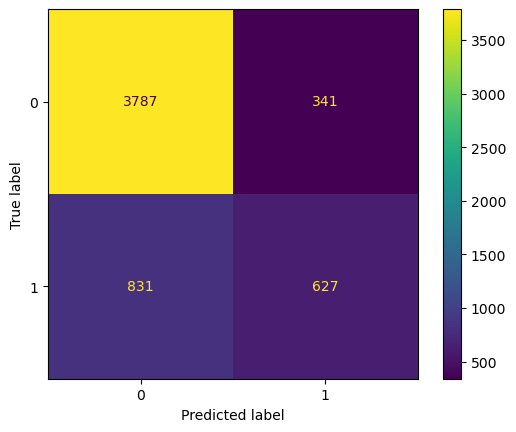

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

In [48]:
#Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test.values) # predict test
y_pred_train=model.predict(X_train.values) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})
display(performance_log)

C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Error_metric,Train,Test
0,Accuracy,0.832617,0.762348
1,Precision,0.738377,0.598684
2,Recall,0.555556,0.464286
